In [1]:
import kplr
import numpy as np
import astropy
from pylab import *
from Functions import *
from scipy.interpolate import interp1d
client = kplr.API()
import batman
from MCMC_class import *
import emcee

%matplotlib inline

In [2]:
planet = client.planet("Kepler-68b")
print(planet.kepoi_name)

K00246.01


In [3]:
time , flux , ferr = Query_database("Kepler-68b")

(4.6, 4.85)

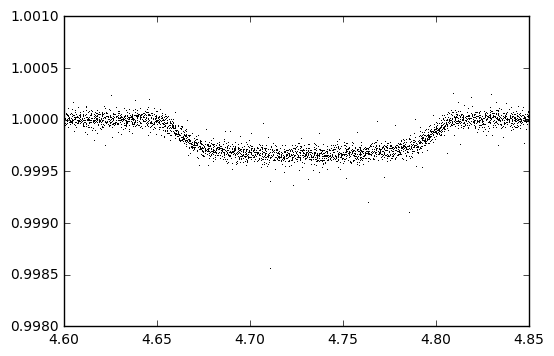

In [221]:
period1 = 5.398763
period2 = 9.605065

timeFold = time%period1
fluxFold = flux%period1

time = time-time[0]
filter = np.abs((flux-np.median(flux))/np.std(flux)) < 5000
timeF = time[filter]
fluxF = flux[filter]
dt = time[1] - time[0]
time_series = np.arange(timeF[0], timeF[-1], dt)


fluxI = interp1d(time, flux, fill_value = 0)
fig = Figure(figsize = (10,7))
plot(timeFold, fluxFold, 'k,')

plot(time, flux, 'k,')
xlim(4.6, 4.85)

# MCMC

In [5]:
#plot(timeFold, fluxI(timeFold), 'k,')

In [6]:
#plot(time, flux)

In [7]:

params = [4.73068772e+00, 
          5.39875601e+00, 
          1.57738454e-02, 
          9.61956841e+00,
          8.99e+01, 
          1.70924210e-01, 
          8.97750763e+01, 
          5.98344886e-01,
          5.75871920e-01] 


# #object to store transit parameters
# params = []
# params.append(4.73)                        #time of inferior conjunction
# params.append(period1)                       #orbital period
# params.append(0.0187)                       #planet radius (in units of stellar radii)
# params.append(10.)                        #semi-major axis (in units of stellar radii)
# params.append(90)                      #orbital inclination (in degrees)
# params.append(0)                       #eccentricity
# params.append(90.)                        #longitude of periastron (in degrees)
# #params.limb_dark = "nonlinear"        #limb darkening model
# params.append(0.6)                     #limb darkening coefficients u1
# params.append(0.6)                     #u2

params = np.array(params)
t = np.linspace(4.5,5, 1300)
transit = TransitModel(t,params)

#print params

#plot(transit)

#paramsGuess = Get_parameter_guesses(time, flux, 5.398763)
#print paramsGuess

(0.9995, 1.0005)

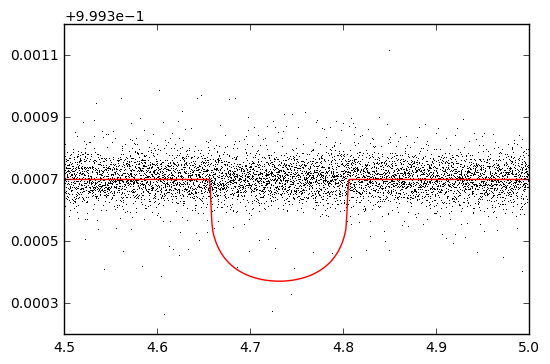

In [9]:
params = [4.73103236e+00,
          5.39875381e+00,
          1.65926688e-02,
          10.46029527e+00,
          8.77334962e+01,
          2.51452439e-02,
          8.48496595e+01,
          4.78268101e-01,
          2.23499625e-01]

#time_period1 = np.linspace
plot(timeFold, fluxFold, 'k,')

#plot(timeFold, fluxFold, 'k,')
tTrans = np.linspace(4,5, 1000)
plot(tTrans, TransitModel(tTrans, params), 'r')
xlim(4.5, 5)
ylim(0.9995, 1.0005)

In [46]:
params = [4.73103236e+00,
          5.39875381e+00,
          1.65926688e-02,
          10.46029527e+00]


NUM_IT = 10000
NUM_WALK = 64
PLANET = "Kepler-68b"

time , flux , ferr = Query_database(PLANET)

time = time-time[0]

inds = (np.abs(time%params[1] - params[0]) < 0.5)
timeFiltered = time[inds]
fluxFiltered = flux[inds]
errFiltered = ferr[inds]

params[0] = params[0] - timeFiltered[0]

In [47]:
print len(time)
print len(timeFiltered)
print timeFiltered[0]

65261
12173
4.25033356368


In [48]:
def setInitBounds(params):
	bounds = []
	for i in xrange(len(params)):
		bounds.append((-np.inf, np.inf))
	return np.array(bounds)


ndims = len(params)

bounds = setInitBounds(params)
bounds[0] = (0, np.inf)
bounds[1] = (0, np.inf)
bounds[2] = (0, 0.4)
bounds[3] = (0, np.inf)

    
emc = MCMC(NUM_WALK, ndims, timeFiltered, fluxFiltered, errFiltered, bounds, numcores = 16)
#emc.performMCMC(params, NUM_IT, name = PLANET+'_chain10000')

Starting MCMC
 0.1%
Mean acceptance fraction: 0.389
 0.2%
Mean acceptance fraction: 0.379
 0.3%
Mean acceptance fraction: 0.385
 0.4%
Mean acceptance fraction: 0.389
 0.5%
Mean acceptance fraction: 0.404
 0.6%
Mean acceptance fraction: 0.423
 0.7%
Mean acceptance fraction: 0.435
 0.8%
Mean acceptance fraction: 0.445
 0.9%
Mean acceptance fraction: 0.449
 1.0%
Mean acceptance fraction: 0.449
 1.1%
Mean acceptance fraction: 0.449
 1.2%
Mean acceptance fraction: 0.450
 1.3%
Mean acceptance fraction: 0.447
 1.4%
Mean acceptance fraction: 0.445
 1.5%
Mean acceptance fraction: 0.444
 1.6%
Mean acceptance fraction: 0.442
 1.7%
Mean acceptance fraction: 0.441
 1.8%
Mean acceptance fraction: 0.443
 1.9%
Mean acceptance fraction: 0.447
 2.0%
Mean acceptance fraction: 0.455
 2.1%
Mean acceptance fraction: 0.463
 2.2%
Mean acceptance fraction: 0.470
 2.3%
Mean acceptance fraction: 0.476
 2.4%
Mean acceptance fraction: 0.480
 2.5%
Mean acceptance fraction: 0.486
 2.6%
Mean acceptance fraction: 0.48

In [18]:
#emc.saveSamples(PLANET+'_samples')

In [49]:
emc.pruneSamples(2000)

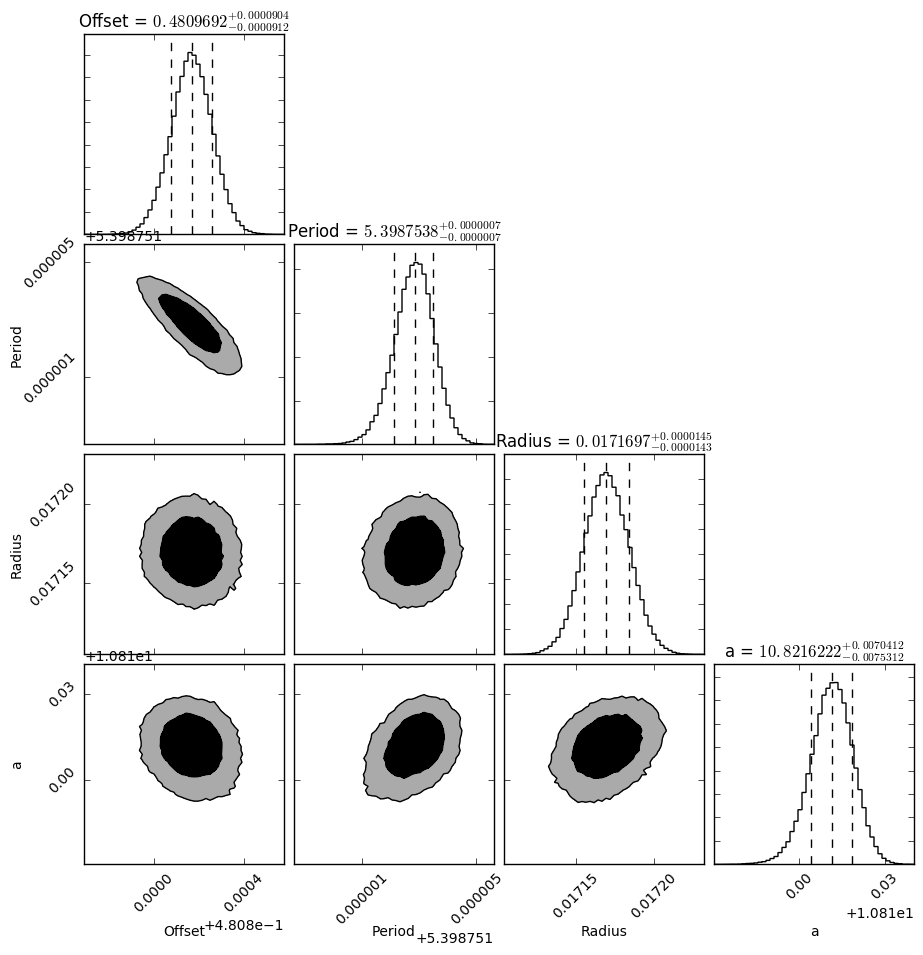

In [301]:
samples = emc.chain()
label = ['Offset', 'Period', 'Radius', 'a']
fig1 = corner.corner(samples, bins=50,
                    plot_datapoints=False,levels=[0.68,0.95],
                    fill_contours=True,max_n_ticks=3,labels=label,
                    quantiles=[0.16, 0.5, 0.84], show_titles=True, 
                    title_fmt = '0.7f', title_kwargs={"fontsize": 12},
                    )
fig1.savefig(PLANET + '_corner.png', format = 'png', dpi = 400)

[  0.48096921   5.39875384   0.01716966  10.82162223]
[  9.03607731e-05   6.53292095e-07   1.44756329e-05   7.04115113e-03]
[  9.11927706e-05   7.10160245e-07   1.42707561e-05   7.53120382e-03]


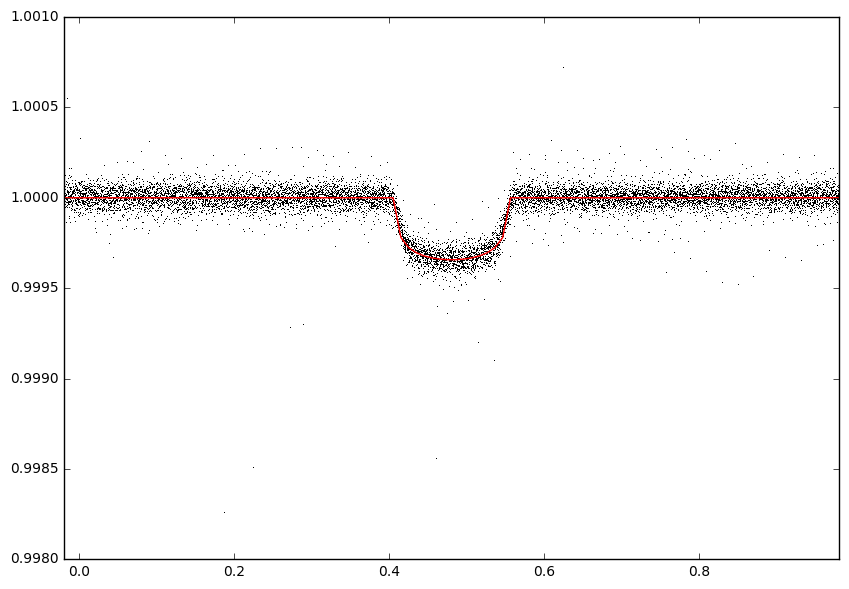

In [149]:
def TransitModel68(time, parameters):
    params     = batman.TransitParams()
    params.t0  = parameters[0]                      # time of inferior conjunction
    params.per = parameters[1]                      # orbital period
    params.rp  = parameters[2]                      # planet radius (in units of stellar radii)
    params.a   = parameters[3]                      # semi-major axis (in units of stellar radii)
    params.inc = 87.68                              # orbital inclination (in degrees)
    params.ecc = 0.02                               # eccentricity
    params.w   = 90                                 # longitude of periastron (in degrees)
    params.u   = [0.3908288, 0.263158]              # limb darkening coefficients [u1, u2]
    params.limb_dark = "quadratic"                  # limb darkening model

    model = batman.TransitModel(params, time)
    return model.light_curve(params)


width = 0.5
paramsMCMC, upper, lower = emc.results()
#fig2 = emc.plotTrans(paramsMCMC, width = 0.5)
#fig2.savefig(PLANET+'_trans.pdf', format = 'pdf')
period = paramsMCMC[1]
offset = paramsMCMC[0]

fig = figure(figsize = (10,7))
timeFold = time%period - timeFiltered[0]
fluxFold = flux%period
start = offset-width
end = offset+width
tTrans = np.linspace(start, end, 100)
#fluxI = interp1d(self.time, self.flux, fill_value = 0)
plt.plot(timeFold, fluxFold, 'k,')

plt.plot(tTrans, TransitModel68(tTrans, paramsMCMC), 'r')
plt.xlim(start, end)

print paramsMCMC
print upper
print lower

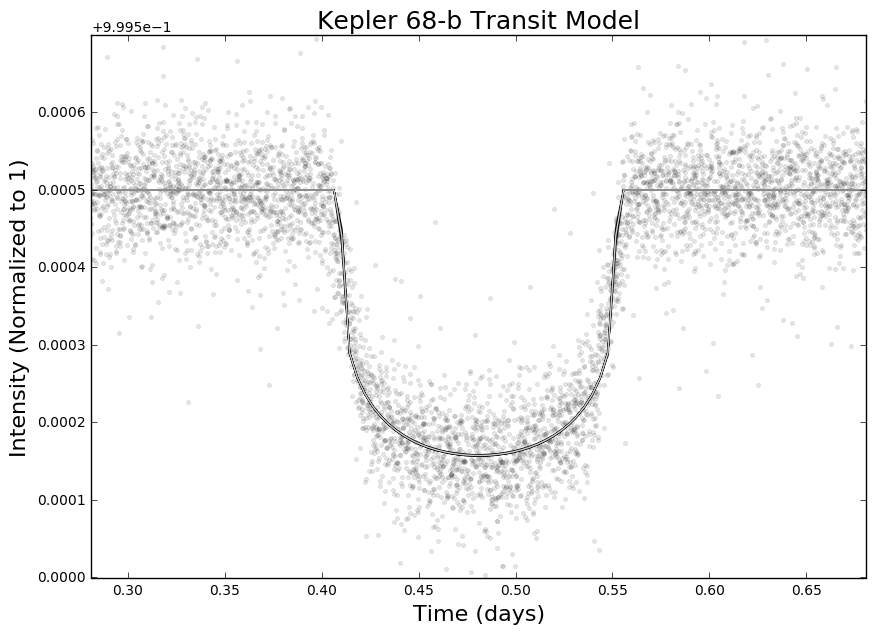

In [292]:
fig = figure(figsize = (10,7))
width = 0.2
timeFold = time%period - timeFiltered[0]
fluxFold = flux%period
start = offset-width
end = offset+width
tTrans = np.linspace(start, end, 100)
#fluxI = interp1d(self.time, self.flux, fill_value = 0)
plt.plot(timeFold, fluxFold, 'k.', alpha = 0.1)

samples = emc.chain()
for theta in samples[np.random.randint(2000, len(samples), size=100)]:
    plt.plot(tTrans, TransitModel68(tTrans, theta), color="k", alpha=0.1, lw = 1)

# samples = emc.origChain()
# print samples.shape
# last = samples[:, 9999, :]
# for theta in last:
#     plt.plot(tTrans, TransitModel68(tTrans, theta), 'k', linewidth = 1, alpha = 0.21)
    
plt.plot(tTrans, TransitModel68(tTrans, paramsMCMC), 'w', lw=1, alpha=0.8)
plt.xlim(start, end)
plt.ylim(0.9995, 1.0002)


plt.title('Kepler 68-b Transit Model', fontsize = 18)
plt.xlabel('Time (days)', fontsize = 16)
plt.ylabel('Intensity (Normalized to 1)', fontsize = 16)
fig.savefig(PLANET + '_TransitModel.png', dpi = 400)

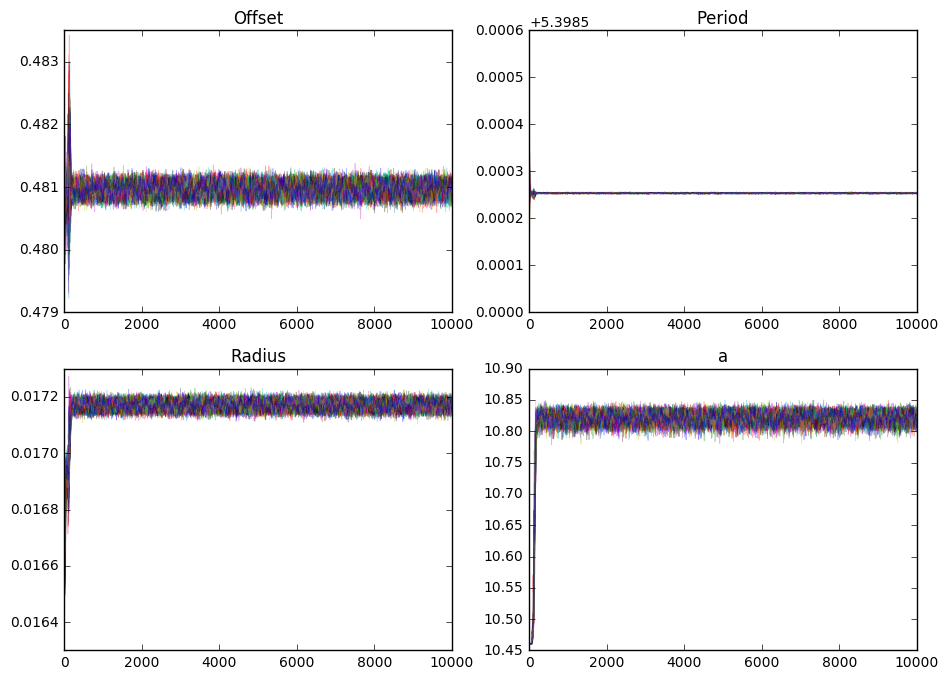

In [69]:
def plotLine(ax, samples, k, label = ['Offset', 'Period', 'Radius', 'a', 'inc', 'e', 'peri', 'u1', 'u2']):
    length = samples.shape[0]
    for i in xrange(length):
        ax.plot(samples[i, :, k], linewidth = 0.5, alpha = 0.3)
        ax.set_xlim(0, 10000)
    ax.set_title(label[k])
chain = emc.origChain()#.reshape(NUM_WALK, NUM_IT, len(params))
fig, ax = plt.subplots(2,2, figsize = (11,8))
plotLine(ax[0,0], chain, 0)
plotLine(ax[0,1], chain, 1)
#ax[0,1].set_ylim(5.39875, 5.39876)
plotLine(ax[1,0], chain, 2)
plotLine(ax[1,1], chain, 3)
#plotLine(ax[1,1], chain, 4)
#plotLine(ax[1,2], chain, 5)
#plotLine(ax[2,0], chain, 6)
#plotLine(ax[2,1], chain, 7)
#plotLine(ax[2,2], chain, 8)
# fig = emc.tracePlot()
fig.savefig(PLANET+'_line.pdf')

# 68 c

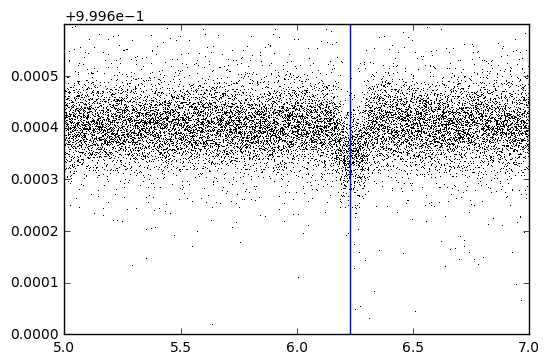

In [233]:
period1 = 5.398763
period2 = 9.605065

paramsMCMCB = np.copy(paramsMCMC)
paramsMCMCB[0] = paramsMCMC[0]+timeFiltered[0]
fluxc = flux-TransitModel68(time, paramsMCMCB)+1

plot(time%period2, fluxc, 'k,')
plt.ylim(0.9996,1.0002)
plt.xlim(5, 7)
plt.axvline(6.23)

In [156]:
paramsMCMCB

array([  4.73130277,   5.39875384,   0.01716966,  10.82162223])

In [263]:
# paramsC = [6.24,
#           period2,
#           1.65926688e-02/2.42,
#           10.46029527e+00*1.5]
paramsC = [  2.31174797e-01,    period2,    8.09383954e-03,   1.80292782e+01]

NUM_IT2 = 10000
NUM_WALK2 = 64
PLANET2 = "Kepler-68c"

time2 , flux2 , ferr2 = Query_database(PLANET)

time2 = time2-time2[0]

inds = (np.abs(time2%paramsC[1] - 6.24) < 0.25)
timeFiltered2 = time2[inds]
fluxFiltered2 = flux2[inds]
errFiltered2 = ferr2[inds]

#paramsC[0] = paramsC[0] - timeFiltered2[0]
print paramsC

[0.231174797, 9.605065, 0.00809383954, 18.0292782]


In [264]:
def setInitBounds(params):
	bounds = []
	for i in xrange(len(params)):
		bounds.append((-np.inf, np.inf))
	return np.array(bounds)


ndims = len(paramsC)

bounds = setInitBounds(paramsC)
bounds[0] = (0, np.inf)
bounds[1] = (0, np.inf)
bounds[2] = (0, 0.4)
bounds[3] = (0, np.inf)

    
emcC = MCMC(NUM_WALK2, ndims, timeFiltered2, fluxFiltered2, errFiltered2, bounds, numcores = 16)
emcC.performMCMC(paramsC, NUM_IT2, name = PLANET2+'_chain10000')

Starting MCMC
 0.1%
Mean acceptance fraction: 0.361
 0.2%
Mean acceptance fraction: 0.371
 0.3%
Mean acceptance fraction: 0.403
 0.4%
Mean acceptance fraction: 0.430
 0.5%
Mean acceptance fraction: 0.459
 0.6%
Mean acceptance fraction: 0.487
 0.7%
Mean acceptance fraction: 0.506
 0.8%
Mean acceptance fraction: 0.525
 0.9%
Mean acceptance fraction: 0.533
 1.0%
Mean acceptance fraction: 0.543
 1.1%
Mean acceptance fraction: 0.546
 1.2%
Mean acceptance fraction: 0.550
 1.3%
Mean acceptance fraction: 0.554
 1.4%
Mean acceptance fraction: 0.558
 1.5%
Mean acceptance fraction: 0.561
 1.6%
Mean acceptance fraction: 0.562
 1.7%
Mean acceptance fraction: 0.562
 1.8%
Mean acceptance fraction: 0.563
 1.9%
Mean acceptance fraction: 0.563
 2.0%
Mean acceptance fraction: 0.563
 2.1%
Mean acceptance fraction: 0.563
 2.2%
Mean acceptance fraction: 0.561
 2.3%
Mean acceptance fraction: 0.561
 2.4%
Mean acceptance fraction: 0.562
 2.5%
Mean acceptance fraction: 0.562
 2.6%
Mean acceptance fraction: 0.56

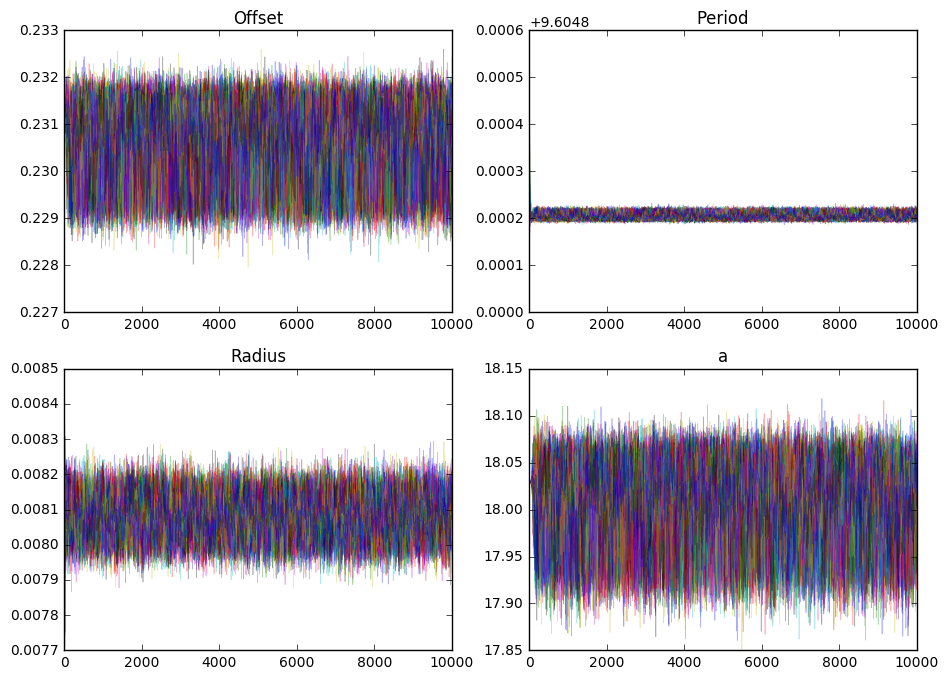

In [267]:
def plotLine(ax, samples, k, label = ['Offset', 'Period', 'Radius', 'a', 'inc', 'e', 'peri', 'u1', 'u2']):
    length = samples.shape[0]
    for i in xrange(length):
        ax.plot(samples[i, :, k], linewidth = 0.5, alpha = 0.3)
        ax.set_xlim(0, samples.shape[1])
    ax.set_title(label[k])
chain = emcC.origChain()#.reshape(NUM_WALK, NUM_IT, len(params))
fig, ax = plt.subplots(2,2, figsize = (11,8))
plotLine(ax[0,0], chain, 0)
plotLine(ax[0,1], chain, 1)
#ax[0,1].set_ylim(5.39875, 5.39876)
plotLine(ax[1,0], chain, 2)
plotLine(ax[1,1], chain, 3)
#plotLine(ax[1,1], chain, 4)
#plotLine(ax[1,2], chain, 5)
#plotLine(ax[2,0], chain, 6)
#plotLine(ax[2,1], chain, 7)
#plotLine(ax[2,2], chain, 8)
# fig = emc.tracePlot()
fig.savefig(PLANET2+'_line.pdf')

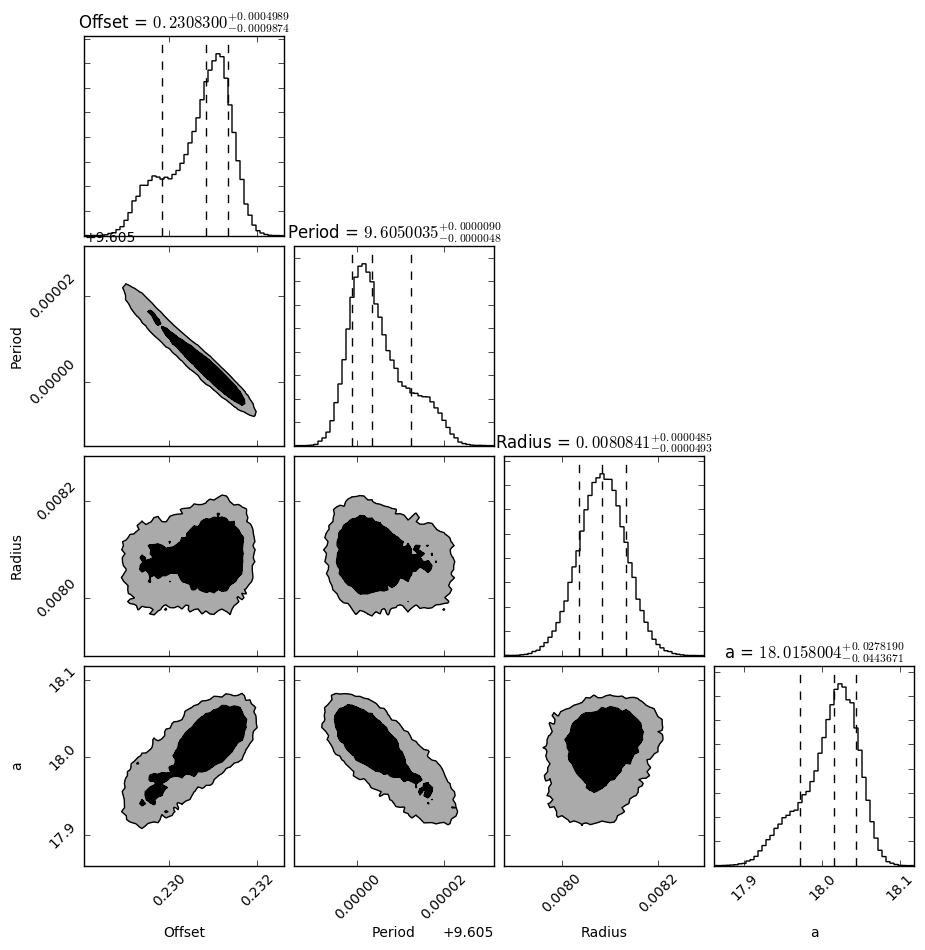

In [299]:
emcC.pruneSamples(6500)
samples = emcC.chain()
label = ['Offset', 'Period', 'Radius', 'a']
fig1 = corner.corner(samples, bins=50,
                    plot_datapoints=False,levels=[0.68,0.95],
                    fill_contours=True,max_n_ticks=3,labels=label,
                    quantiles=[0.16, 0.5, 0.84], show_titles=True, 
                    title_fmt = '0.7f', title_kwargs={"fontsize": 12},
                    )
fig1.savefig(PLANET2 + '_corner.png', format = 'png', dpi = 400)

In [269]:
#fig = figure(figsize = (10, 7))
#for i in xrange(64):
#    plt.plot(emcC.sampler.lnprobability[i, 500:])
inds = np.argmax(np.max(emcC.sampler.lnprobability, axis = 1))
print inds
print np.argmax(emcC.sampler.lnprobability[inds, :])
print emcC.sampler.lnprobability[49, 1403]
samples = emcC.origChain()
print samples[49, 1403]

15
2499
-28189.2661857
[  2.30660356e-01   9.60500686e+00   8.05746340e-03   1.79989143e+01]


[  2.30830043e-01   9.60500349e+00   8.08414786e-03   1.80158004e+01]
[  4.98889199e-04   8.98529226e-06   4.85293363e-05   2.78189819e-02]
[  9.87442514e-04   4.81854856e-06   4.92791055e-05   4.43671462e-02]


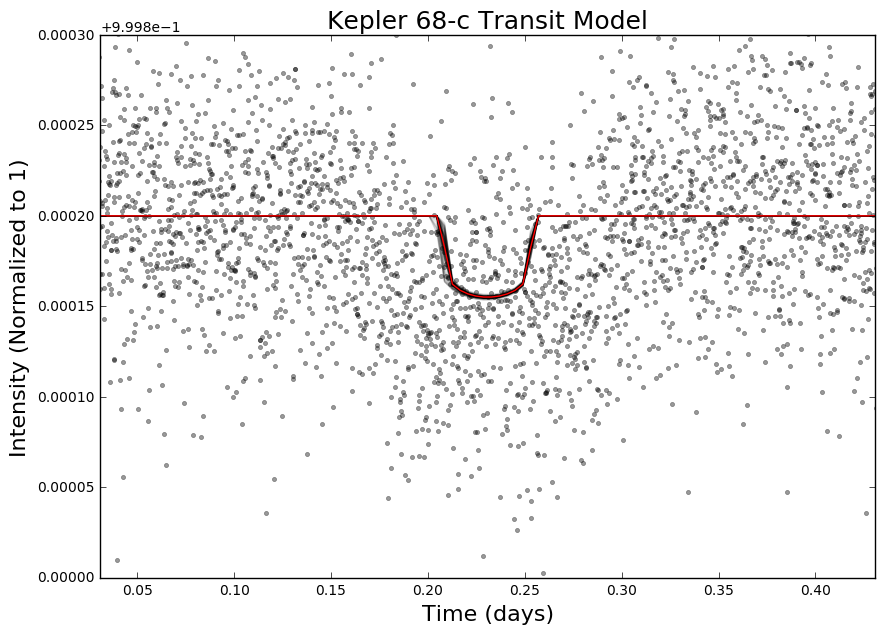

In [302]:
def TransitModel68C(time, parameters):
    params     = batman.TransitParams()
    params.t0  = parameters[0]                      # time of inferior conjunction
    params.per = parameters[1]                      # orbital period
    params.rp  = parameters[2]                      # planet radius (in units of stellar radii)
    params.a   = parameters[3]                      # semi-major axis (in units of stellar radii)
    params.inc = 86.93                              # orbital inclination (in degrees)
    params.ecc = 0.0                                # eccentricity
    params.w   = 90                                 # longitude of periastron (in degrees)
    params.u   = [0.3908288, 0.263158]              # limb darkening coefficients [u1, u2]
    params.limb_dark = "quadratic"                  # limb darkening model

    model = batman.TransitModel(params, time)
    return model.light_curve(params)

width = 0.2
paramsMCMC2, upperC, lowerC = emcC.results()
#fig2 = emc.plotTrans(paramsMCMC, width = 0.5)
#fig2.savefig(PLANET+'_trans.pdf', format = 'pdf')
period2 = paramsMCMC2[1]
offset2 = paramsMCMC2[0]

fig = figure(figsize = (10,7))
timeFold2 = time%period2 - timeFiltered2[0]
fluxFold2 = fluxc
start = offset2-width
end = offset2+width
tTrans = np.linspace(start, end, 100)
#fluxI = interp1d(self.time, self.flux, fill_value = 0)
plot(timeFold2, fluxc, 'k.', alpha = 0.4)

samples = emcC.chain()
for theta in samples[np.random.randint(2000, len(samples), size=100)]:
    plt.plot(tTrans, TransitModel68C(tTrans, theta), color="k", alpha=0.1, lw = 1)

plt.plot(tTrans, TransitModel68C(tTrans, paramsMCMC2), 'r')
plt.xlim(start, end)
plt.ylim(.9998, 1.0001)

plt.title('Kepler 68-c Transit Model', fontsize = 18)
plt.xlabel('Time (days)', fontsize = 16)
plt.ylabel('Intensity (Normalized to 1)', fontsize = 16)

print paramsMCMC2
print upperC
print lowerC
fig.savefig(PLANET2+'_transitModel.png', dpi = 400)